# Exploratory data analysis of Titanic data

In [36]:
import pandas as pd
import os
import numpy as np
import datetime
import duckdb
from plotnine import *
import binsreg
pd.set_option("display.max_rows", 20)

In [5]:
filename = os.getcwd() + "/train.csv"
data = pd.read_csv(filename)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA ideas
1. Split out names, titles, do light NLP on name origin and title
1. Distributions of survived, class, sex, age, siblings, parents children, fare, embarked, cabin
1. Light NLP on ticket numbers
1. Light NLP on cabin numbers
1. Survived vs class, sex, age, sibsp, parch, fare, cabin, embarked
1. Interaction effects
    1. Survived vs sex and age
    1. Survived vs age and class
    1. Fare vs cabin and class
    1. Embarked vs class
    1. Sex vs class
    1. Sex vs age
    1. parch vs age, class, gender
    1. sibsp vs age, class, gender
    

# Overall variable and survival plots

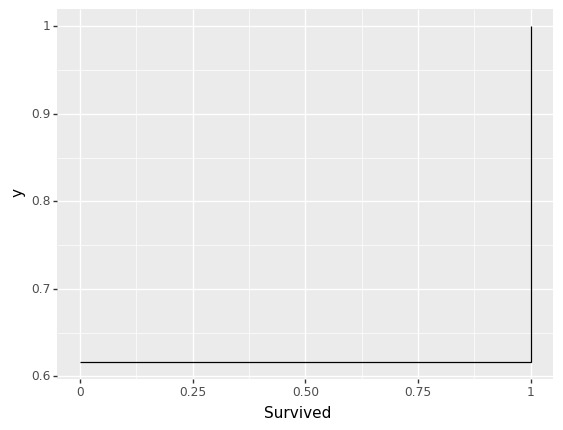

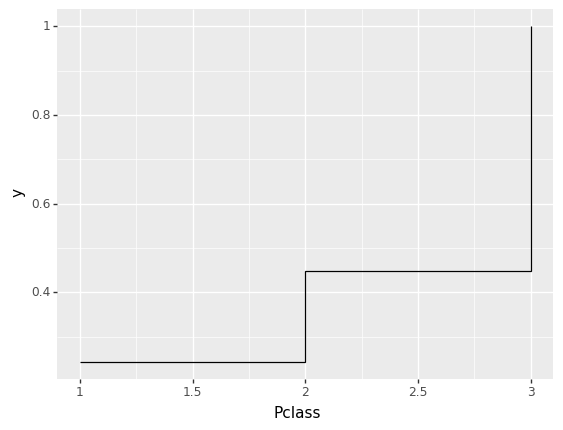

/Users/sidbasu/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_ecdf : Removed 177 rows containing non-finite values.


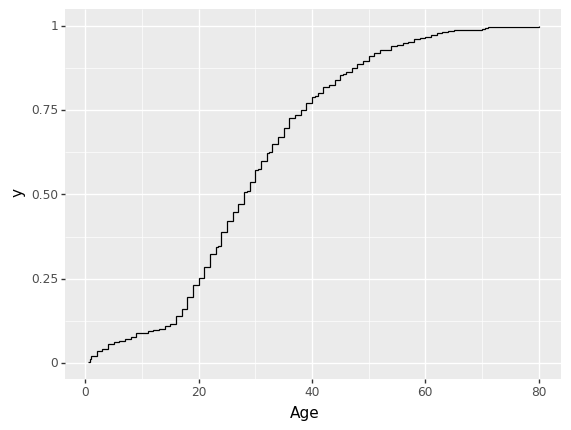

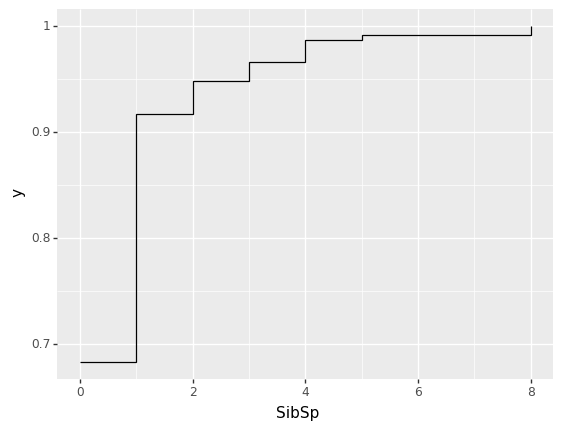

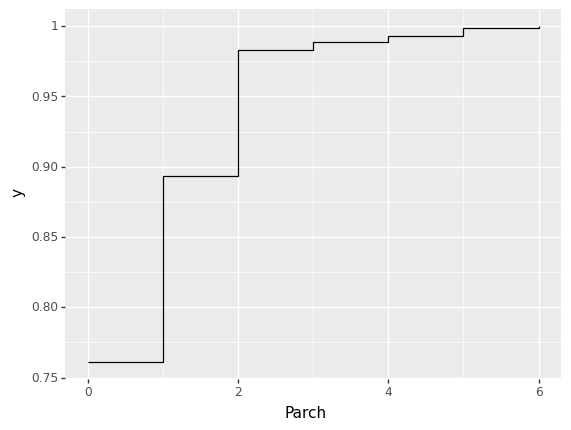

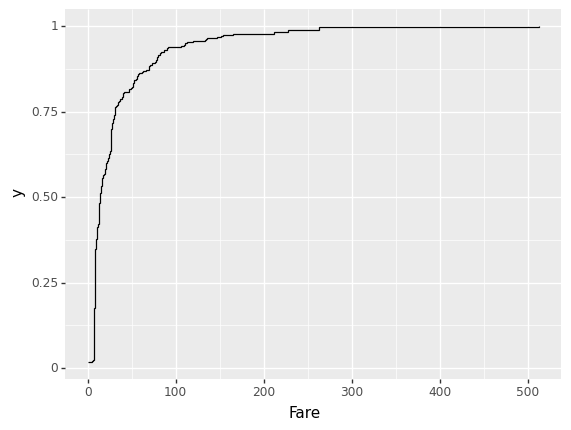

[<ggplot: (8791279918680)>,
 <ggplot: (8791295178283)>,
 <ggplot: (8791279940660)>,
 <ggplot: (8791279943078)>,
 <ggplot: (8791279950008)>,
 <ggplot: (8791279950894)>]

In [43]:
def plot_ecdf(data, var):
    ret = (ggplot(data, aes(x = var)) + stat_ecdf())
    return(ret)

numerical_vars = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
other_vars = ['Name', 'Ticket', 'Cabin']

ecdf_plots = [plot_ecdf(data, var) for var in numerical_vars]

ecdf_plots

In [34]:
numerical_vars = ['Sex', 'Embarked']

for var in categorical_vars:
    print("Probability density for variable " + var)
    print(100 * data[var].value_counts(normalize = True))
    print("\n")

Probability density for variable Sex
male      64.758698
female    35.241302
Name: Sex, dtype: float64


Probability density for variable Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64




# Binscatter survival by key variables

In [74]:
def binscatter_survival(df, var, numeric = False):
    df_tmp = df
    var_new = var + '_group'

    if(numeric):
        df_tmp[var_new] = pd.qcut(df_tmp[var], 10)

    else:
        df_tmp[var_new] = df_tmp[var]

    pivot = data.groupby(var_new).agg(avg_survival = ('Survived', 'mean')).reset_index()

    ret = (
        ggplot(pivot, aes(x = var_new, y =  'avg_survival')) + 
        geom_point() +
        theme(axis_text_x = element_text(angle = 45, hjust = 1))
    )
    
    return(ret)

#binscatter_survival(data, 'Fare', numeric = True)

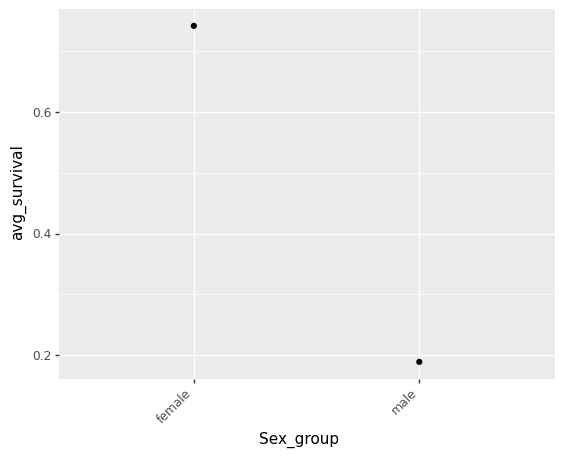

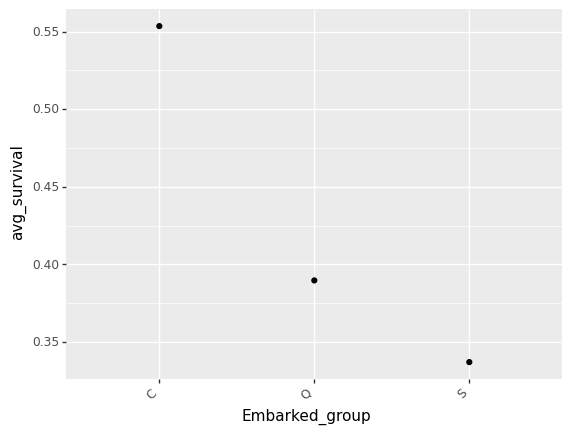

[<ggplot: (8791279403740)>, <ggplot: (8791262369702)>]

In [77]:
categorical_plots = [binscatter_survival(data, item) for item in categorical_vars]

categorical_plots

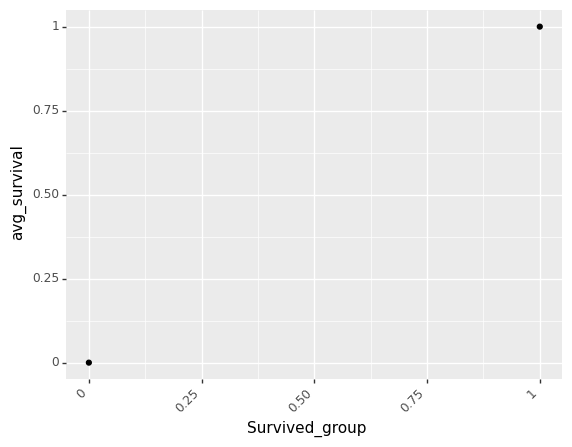

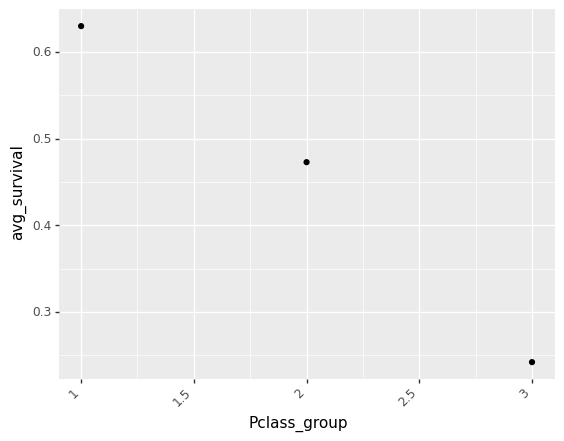

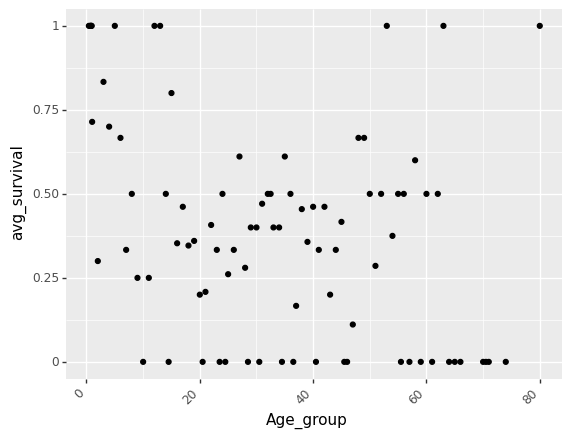

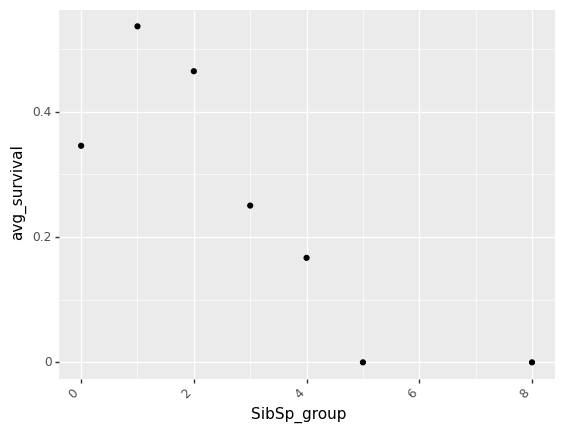

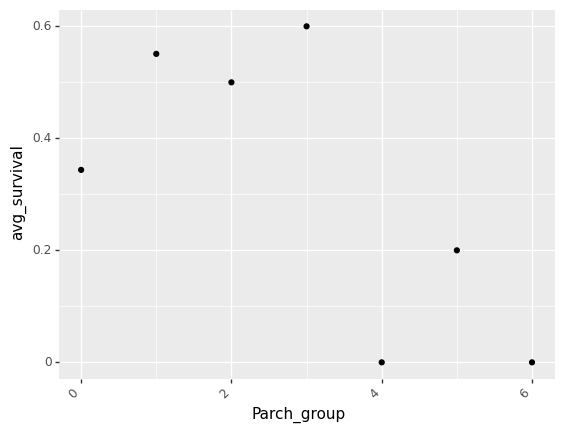

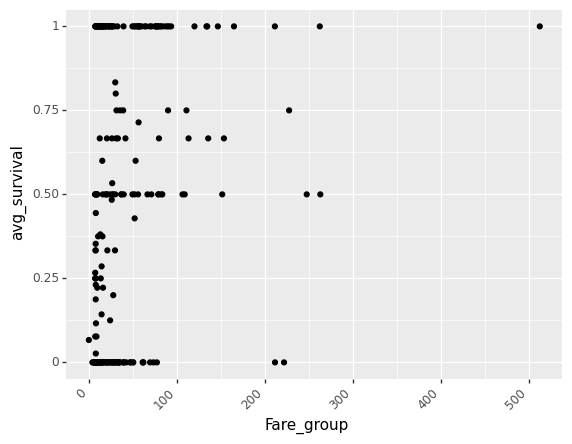

[<ggplot: (8791280293901)>,
 <ggplot: (8791280278071)>,
 <ggplot: (8791280613431)>,
 <ggplot: (8791231591141)>,
 <ggplot: (8791280619837)>,
 <ggplot: (8791295177283)>]

In [81]:
numerical_plots = [binscatter_survival(data, item) for item in numerical_vars]

numerical_plots

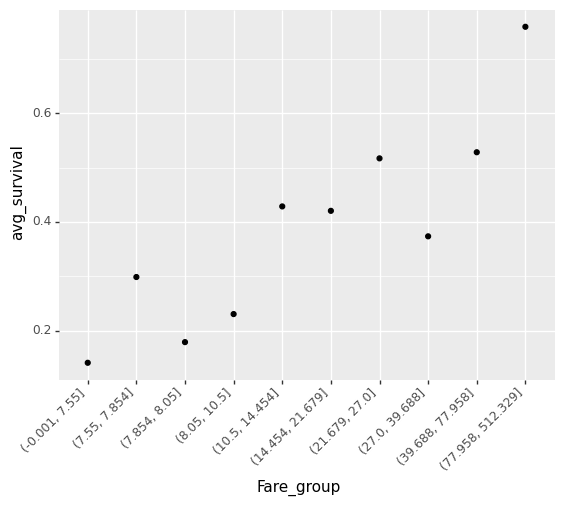

<ggplot: (8791231725017)>

In [82]:
binscatter_survival(data, 'Fare', numeric=True)

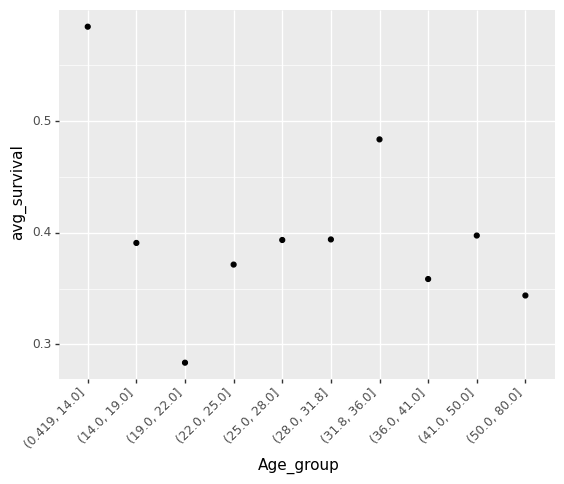

<ggplot: (8791279916219)>

In [83]:
binscatter_survival(data, 'Age', numeric=True)